### Histogram, PDF, CDF
Plot CDF using lineplot or simple plot from scratch.  
We will implement histogram, PDF, CDF from the scratch.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(100)

#generate 100 random integers
array = np.random.randint(0,100,size=100)

# array = [1,1,2,2,3,4,6,6,7,7,7,7,7,9,9,10,10]
# array = [1,2,3,4,5,6]

First let's try to plot using libraries

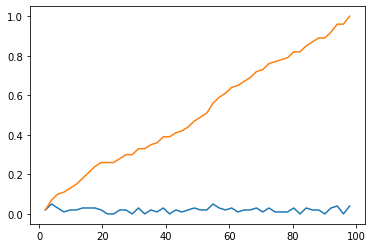

In [3]:
counts, bin_edges = np.histogram(array,bins=50)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
# print(counts,bin_edges)
plt.plot(bin_edges[1:],pdf,bin_edges[1:],cdf)

Now let's implement everything from scratch

In [4]:
def histogram_my(arr,bins):
    '''
    takes array and number of bins as input.
    returns element counts and bin edges(range).
    '''
    arr = sorted(arr)
    min_ele = min(arr)
    max_ele = max(arr)
    step_size = (max_ele - min_ele)/bins
    bin_range = [arr[0]]
    counts_ele = []
    for i in range(1,bins+1):
        next_limit = bin_range[i-1]+step_size
        bin_range.append(next_limit)
        # not good way to count
        # bin edge is [a,b) upto last element
        # for last element it is [a,b]
        if i<bins:
            counts_ele.append(len(list(filter(lambda x: bin_range[i-1]<=x<bin_range[i],arr))))
        else:
            counts_ele.append(len(list(filter(lambda x: bin_range[i-1]<=x,arr))))

    return(counts_ele,bin_range)

def pdf_my(arr,bins):
    '''
    Calculate PDF for given array. It uses histogram_my internally.
    returns pdf_x(bin_edges[1:]) and pdf_y(pdf values)
    '''
    ele_counts,bin_edge = histogram_my(arr,bins)
    sum_counts = sum(ele_counts)
    pdf_y = [x/sum_counts for x in ele_counts]
    pdf_x = bin_edge[1:]
    # print(pdf_x,pdf_y)
    return pdf_x,pdf_y

def cdf_my(arr,bins):
    '''
    Calculate CDF for given array. It uses pdf_my internally.
    returns cdf_x(=pdf_x=bin_edges[1:]) and cdf_y(cdf values)
    '''
    pdf_x,pdf_y = pdf_my(array,bins)
    cumsum = [pdf_y[0]]
    for i in range(1,len(pdf_x)):
        cumsum.append(cumsum[i-1]+pdf_y[i])
    # print(cumsum)
    return pdf_x,cumsum

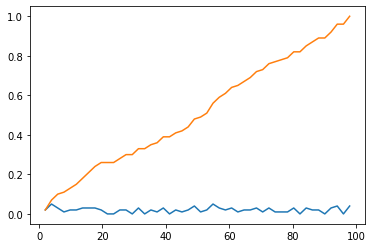

In [5]:
# Driver code
no_of_bins = 50
pdf_x, pdf_y = pdf_my(array, no_of_bins)
cdf_x, cdf_y = cdf_my(array, no_of_bins)
plt.plot(pdf_x, pdf_y, cdf_x, cdf_y)

We got the exact same plot!!